# Classification

we can train a model to classify the data into different calasses. for example, dog and cat, or healthy and sick. The number of classes depends on the nature of the problem. Lets generate a random classification dataset first

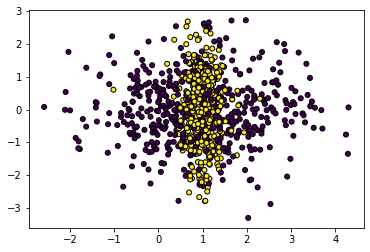

In [22]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

x, y = make_classification(1000,
    n_features=10, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [23]:
x.shape

(1000, 10)

In [24]:
y.shape

(1000,)

In [31]:
from collections import Counter
Counter(y)

Counter({0: 499, 1: 501})

lets divide the data into train and test

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)
    

import the classificaion model( here is support vector machine ) and train the model on the training data




In [52]:
from sklearn import svm
model =  svm.LinearSVC() # load the model
model.fit(x_train, y_train) # train the model on the training data


LinearSVC()

predict the test data using the trained model

In [46]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

measure the accuracy of the model on the test data

In [53]:
from sklearn.metrics import  accuracy_score

accuracy_score(y_test,y_pred)

0.9533333333333334

In [54]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       140
           1       0.97      0.94      0.96       160

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



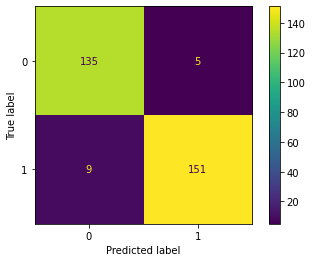

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()
plt.show()

In [75]:
import pandas as pd , numpy as np
coefficient = pd.DataFrame(data=np.transpose(model.coef_)) #coefficente vector
coefficient.columns = ["Healthy_Sick"]
coefficient

,Healthy_Sick
0,0.683093
1,0.032031
2,0.023966
3,-0.070180
4,0.002503
5,0.021763
6,0.014848
7,0.055984
8,0.040115
9,1.209383


In [76]:
coefficient = coefficient.sort_values("Healthy_Sick", ascending=True)
print(coefficient.sort_values("Healthy_Sick", ascending=True))

   Healthy_Sick
3     -0.070180
4      0.002503
6      0.014848
5      0.021763
2      0.023966
1      0.032031
8      0.040115
7      0.055984
0      0.683093
9      1.209383


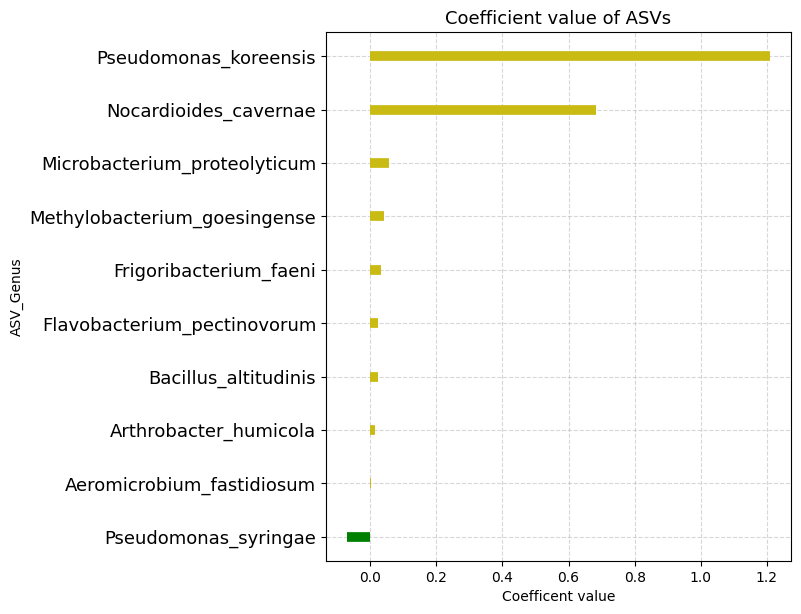

In [80]:
coefficient.index = ['Pseudomonas_syringae' ,'Aeromicrobium_fastidiosum', 'Arthrobacter_humicola',
       'Bacillus_altitudinis', 'Flavobacterium_pectinovorum',
       'Frigoribacterium_faeni', 'Methylobacterium_goesingense',
       'Microbacterium_proteolyticum', 'Nocardioides_cavernae',
       'Pseudomonas_koreensis']
coefficient['colors'] = ['green' if x < 0 else '#c9ba14' for x in coefficient['Healthy_Sick']]
plt.figure(figsize=(6,7), dpi= 100) 
plt.hlines(y=coefficient.index, xmin=0, xmax=coefficient.Healthy_Sick, linewidth=7 , color=coefficient.colors)
plt.gca().set(ylabel='ASV_Genus', xlabel='Coefficent value')
plt.yticks(coefficient.index, fontsize=13)
plt.title('Coefficient value of ASVs', fontdict={'size':13})
plt.grid(linestyle='--', alpha=0.5)
# legend

#Regression
what if we want to predict a real value as the output? for example the stock market prediction. here we train a so calld regression  model. lets train a linear regression model and see the predicted line

we use the diabetes dataset which predict the score of having diabetes based on 10 features. lets load the dataset

In [81]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

we only use one of the 10 features so we can visualize the data in a 2d plot. 

In [82]:
# Use only one feature
diabetes_X = diabetes_X[:, 2].reshape(-1,1)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

now lets define our linear regression model which tries to fit a line to the data

In [83]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

In [84]:
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


lets visualize the data and the predicted line

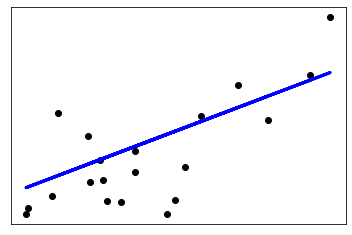

In [85]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()